# Introduction to Convolutional Neural Networks and Computer vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in fron

## Get the data

The images we're working with are from the Food101 dataset 
(101 different classes of food) from kaggle

However we have modified it to only use two classes (pizza and steak) using the image data modification notebook.

We start with a smaller dataset so we can experiment quickly and figure out what works and what doesn't work before scaling up

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-07-15 12:43:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 108.177.119.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   238MB/s    in 0.4s    

2022-07-15 12:43:01 (238 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (Become one with the data)

A very crucial step at the beginning of any machine learning project is becoming one with the DeprecationWarning
And for a computer vision project.. this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os 

# Walk through the pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jul 15 12:43 .
drwxr-xr-x 1 root root 4096 Jul 15 12:43 ..
drwxr-xr-x 4 root root 4096 Jul 15 12:43 test
drwxr-xr-x 4 root root 4096 Jul 15 12:43 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically. 

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in iamge and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image Shape: {img.shape} ")

  return img

Image Shape: (341, 512, 3) 


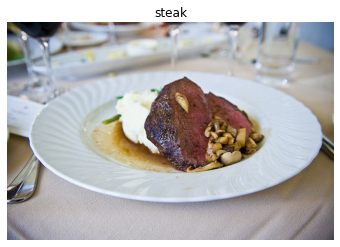

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class= "steak")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(341, 512, 3), dtype=uint8, numpy=
array([[[ 57,  52,  23],
        [ 60,  55,  23],
        [ 63,  59,  24],
        ...,
        [ 73, 105, 143],
        [ 71, 103, 141],
        [ 70, 102, 140]],

       [[ 62,  57,  27],
        [ 66,  61,  29],
        [ 70,  66,  29],
        ...,
        [ 74, 106, 144],
        [ 72, 104, 142],
        [ 71, 103, 141]],

       [[ 65,  62,  29],
        [ 69,  66,  31],
        [ 72,  70,  31],
        ...,
        [ 75, 107, 145],
        [ 73, 105, 143],
        [ 72, 104, 142]],

       ...,

       [[ 89,  91, 106],
        [ 99, 101, 116],
        [ 97,  96, 112],
        ...,
        [ 69,  66,  77],
        [ 69,  66,  75],
        [ 70,  67,  74]],

       [[ 91,  90, 104],
        [101, 100, 116],
        [ 92,  91, 109],
        ...,
        [ 68,  65,  74],
        [ 68,  65,  72],
        [ 70,  67,  74]],

       [[ 98,  94, 109],
        [ 97,  94, 111],
        [ 90,  88, 109],
        ...,
        [ 68,  65,  7

In [ ]:
# View the image shape
img.shape #returns the width height and color channels

(341, 512, 3)

As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255 (since 255 is the maximum pixel value)

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.22352941, 0.20392157, 0.09019608],
        [0.23529412, 0.21568627, 0.09019608],
        [0.24705882, 0.23137255, 0.09411765],
        ...,
        [0.28627451, 0.41176471, 0.56078431],
        [0.27843137, 0.40392157, 0.55294118],
        [0.2745098 , 0.4       , 0.54901961]],

       [[0.24313725, 0.22352941, 0.10588235],
        [0.25882353, 0.23921569, 0.11372549],
        [0.2745098 , 0.25882353, 0.11372549],
        ...,
        [0.29019608, 0.41568627, 0.56470588],
        [0.28235294, 0.40784314, 0.55686275],
        [0.27843137, 0.40392157, 0.55294118]],

       [[0.25490196, 0.24313725, 0.11372549],
        [0.27058824, 0.25882353, 0.12156863],
        [0.28235294, 0.2745098 , 0.12156863],
        ...,
        [0.29411765, 0.41960784, 0.56862745],
        [0.28627451, 0.41176471, 0.56078431],
        [0.28235294, 0.40784314, 0.55686275]],

       ...,

       [[0.34901961, 0.35686275, 0.41568627],
        [0.38823529, 0.39607843, 0.45490196],
        [0.38039216, 0

## An end-to-end example

Let's build a convolution neural network to find patterns in our images, more specifically we need a way to: 

* Load our images
* Preprocess our images
* buuild a CNN to find patterns in our images
* Compile our CNN 
* Fit the CNN to our training data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# preprocess data (get all of the pixel values between 0 &1, also called normalization or scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set path to our directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)

# Build a CNN model (same as the Tine VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters = 10,
                                                             kernel_size =3,
                                                             activation = "relu",
                                                             input_shape = (224, 224, 3)),
                                      tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
                                      tf.keras.layers.MaxPool2D( pool_size=2,
                                                                padding = 'valid'),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile a model 
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit model 
history_1 = model_1.fit(train_data,
                        epochs = 5, 
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 115s 2s/step - loss: 0.5709 - accuracy: 0.6920 - val_loss: 0.3901 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 105s 2s/step - loss: 0.4293 - accuracy: 0.8087 - val_loss: 0.3579 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 118s 3s/step - loss: 0.4053 - accuracy: 0.8293 - val_loss: 0.3893 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 104s 2s/step - loss: 0.3608 - accuracy: 0.8460 - val_loss: 0.3819 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 109s 2s/step - loss: 0.3183 - accuracy: 0.8667 - val_loss: 0.3028 - val_accuracy: 0.8840


In [ ]:
model_1.evaluate(valid_data)

16/16 [==============================] - 11s 687ms/step - loss: 0.3028 - accuracy: 0.8840


[0.30280402302742004, 0.8840000033378601]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

GPU acceleration is useful when training larger models as well as for image classification. 

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data. 


In [ ]:
# set the random seed
tf.random.set_seed(42)

# Create a model to replicate the Tensorflow model 
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape =(224, 224, 3)),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(1, activation = "sigmoid")
])

# compile the model
model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model 
history_2 = model_2.fit(train_data, 
                        epochs = 5, 
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))



Epoch 1/5
47/47 [==============================] - 13s 274ms/step - loss: 2.1640 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 259ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 257ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 13s 271ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 14s 302ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.evaluate(valid_data)

16/16 [==============================] - 3s 175ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931504607200623, 0.5]

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our model_1, model_2 still performs terribly

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model (same as above)
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (224, 224,3)),
                               tf.keras.layers.Dense(100, activation = 'relu'),
                               tf.keras.layers.Dense(100, activation = 'relu'),
                               tf.keras.layers.Dense(100, activation = 'relu'),
                               tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile the model 
model_3.compile(loss= 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 16s 326ms/step - loss: 3.5787 - accuracy: 0.6073 - val_loss: 0.6473 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 15s 314ms/step - loss: 0.8172 - accuracy: 0.7140 - val_loss: 0.5198 - val_accuracy: 0.7640
Epoch 3/5
47/47 [==============================] - 15s 315ms/step - loss: 0.7784 - accuracy: 0.6867 - val_loss: 0.4687 - val_accuracy: 0.7600
Epoch 4/5
47/47 [==============================] - 15s 319ms/step - loss: 0.7077 - accuracy: 0.7313 - val_loss: 0.8221 - val_accuracy: 0.7080
Epoch 5/5
47/47 [==============================] - 16s 339ms/step - loss: 0.5523 - accuracy: 0.7680 - val_loss: 0.7468 - val_accuracy: 0.6580


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.evaluate(valid_data)

16/16 [==============================] - 3s 192ms/step - loss: 0.7468 - accuracy: 0.6580


[0.7468394637107849, 0.6579999923706055]

## Binary Classification : Let's break it down 

1. Become one with the data (visualize, visualize, visualize)

2. Preprocess the data (prepare it for our model, the main steap here was scaling/normalizing)

3. Create a model (start with a baseline

4. Fit the model 

5. Evaluate the model 

6. Adjust different parameters and improve the model (try to beat our baseline)

7. Repeat until satisfied (experiment, experiment, experiment)

### `1`. Become one with the data

Image Shape: (512, 512, 3) 
Image Shape: (512, 512, 3) 


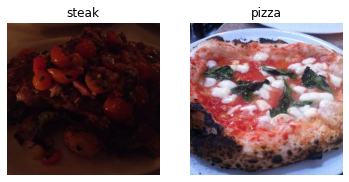

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1 ,2 ,2)
steak_img = view_random_image("pizza_steak/train/", "pizza")

### `2`. Preprocess the data

* Turn all our data into numbers (neural networks can't handle images) 

* Make sure all of the tensors are the right shape

* Scale features (normalize or standardize, neural networks tend to perform better when all data is between 0 & 1)


Normally step 1 would be to split data into train and test sets, but that has already been done for us with this dataset

In [ ]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**: 

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor

2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well. 

Why 32? 

Because 32 is ideal for batch size.

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, # Target directory of images
                                               target_size = (224, 224), # Target size of images (height, width)
                                               class_mode = 'binary', # Type of data we're working with 
                                               batch_size = 32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory = test_dir, 
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the next batch of images/labels in train data
len(images) , len(labels)

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
# Get the first two images 
images[:2] , images[0].shape

(array([[[[0.1254902 , 0.1137255 , 0.08627451],
          [0.12941177, 0.11764707, 0.09019608],
          [0.13725491, 0.1254902 , 0.09803922],
          ...,
          [0.01960784, 0.0509804 , 0.        ],
          [0.01960784, 0.0509804 , 0.        ],
          [0.02352941, 0.05490196, 0.00392157]],
 
         [[0.12941177, 0.11764707, 0.09019608],
          [0.13333334, 0.12156864, 0.09411766],
          [0.14117648, 0.12941177, 0.10196079],
          ...,
          [0.01960784, 0.0509804 , 0.        ],
          [0.01960784, 0.0509804 , 0.        ],
          [0.01960784, 0.0509804 , 0.        ]],
 
         [[0.13333334, 0.12156864, 0.09411766],
          [0.13725491, 0.1254902 , 0.09803922],
          [0.14509805, 0.13333334, 0.10588236],
          ...,
          [0.02352941, 0.05490196, 0.00392157],
          [0.02352941, 0.05490196, 0.00392157],
          [0.02352941, 0.05490196, 0.00392157]],
 
         ...,
 
         [[0.        , 0.04313726, 0.01960784],
          [0.     

In [ ]:
# View the first batch of labels
labels

array([1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
      dtype=float32)

### `3`. Create a model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when begining a machine learning experiment.

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
                      Conv2D(filters = 10, # filters i the number of sliding windows going across and input (higher =  more complex model)
                             kernel_size = 3,  # the size of the sliding window going across an input 
                             strides = 1, # The size of the step the sliding window takes across an input
                             padding = "valid", # if "same", output shape is same as input shape, if "valid" output shape gets compressed 
                             activation = 'relu',
                             input_shape = (224, 224,3)), # input layer (verify input shape)
                      Conv2D(10, 3, activation  = 'relu'),
                      Conv2D(10, 3, activation  = 'relu'),
                      Flatten(),
                      Dense(1, activation = 'sigmoid') # Output layer (working with binary classifcation so only 1 output neuron)                     
])



In [ ]:
# Compile the model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### `4`. Fit the model 

In [ ]:
# Check the lengths of training and test data generators
len(train_data) , len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 123s 3s/step - loss: 1.1096 - accuracy: 0.6800 - val_loss: 0.4176 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 121s 3s/step - loss: 0.4085 - accuracy: 0.8280 - val_loss: 0.4390 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 121s 3s/step - loss: 0.2754 - accuracy: 0.8987 - val_loss: 0.4211 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 121s 3s/step - loss: 0.1370 - accuracy: 0.9587 - val_loss: 0.4443 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 120s 3s/step - loss: 0.0470 - accuracy: 0.9873 - val_loss: 0.6396 - val_accuracy: 0.7780


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 11s 683ms/step - loss: 0.3028 - accuracy: 0.8840


[0.3028040826320648, 0.8840000033378601]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### `5`. Evaluating our model

It looks like our model is learning something, let's evaluate it.

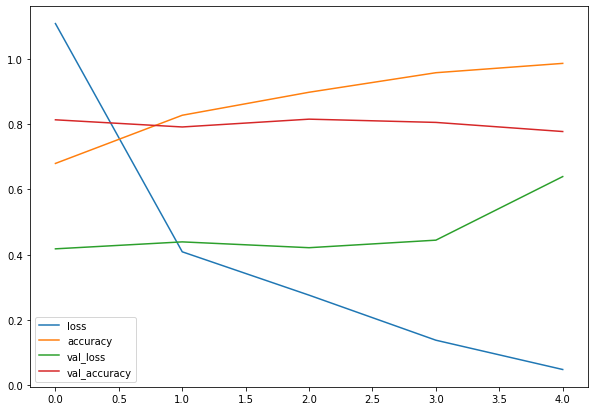

In [ ]:
# Let's plot the training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10, 7));

In [ ]:
# Plot the validation and training curves seperately 
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label = 'training loss')
  plt.plot(epochs, val_loss, label = 'validation loss')
  plt.title("loss")
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = 'training accuracy')
  plt.plot(epochs, val_accuracy, label = 'validation accuracy')
  plt.title("accuracy")
  plt.xlabel('epochs')
  plt.legend()


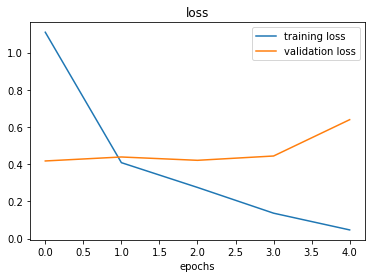

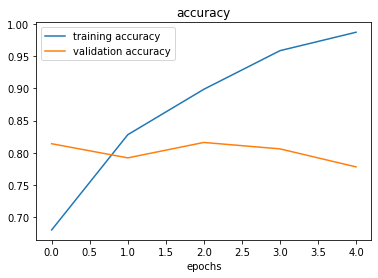

In [ ]:
# CHeck out the loss and accuracy 
plot_loss_curves(history_4)

**Note** WHen a model's validation loss starts to increase, it's likely that the model is overfitting the training dataset. This means it's learning the patterns in the training dataset too well and thus the model's ability to generalize to unseen data will be dimished

### `6`. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting 

Ways to induce overfitting:

1. Increase the number of conv layers
2. Increase the number of conv filters
3. Add another dense layer to the output of our flattened layer 

Ways to reduce overfitting

1. Add data augmentation
2. Add regularization layers (such as MaxPool2D) 
3. Add more data

Reducing overfitting is also known as **regularization**

In [ ]:
# set seed
tf.random.set_seed(42)
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
                      Conv2D(10, 3, activation = 'relu', input_shape =(224, 224, 3)),
                      MaxPool2D(2), 
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation = 'sigmoid')
])

# Compile the model 
model_5.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model 
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 54s 1s/step - loss: 0.5690 - accuracy: 0.6967 - val_loss: 0.4412 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 54s 1s/step - loss: 0.4430 - accuracy: 0.8047 - val_loss: 0.3775 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 53s 1s/step - loss: 0.4075 - accuracy: 0.8187 - val_loss: 0.3873 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 58s 1s/step - loss: 0.3890 - accuracy: 0.8347 - val_loss: 0.3263 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 53s 1s/step - loss: 0.3585 - accuracy: 0.8487 - val_loss: 0.2985 - val_accuracy: 0.8720


In [ ]:
# Get a summary 
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_5.evaluate(valid_data)

16/16 [==============================] - 7s 416ms/step - loss: 0.2985 - accuracy: 0.8720


[0.29849889874458313, 0.871999979019165]

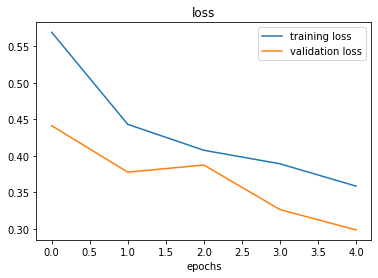

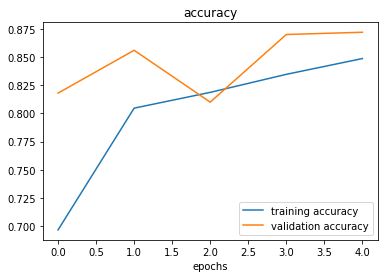

In [ ]:
plot_loss_curves(history_5)

#### Data Augmentation

In [ ]:
# Create ImageDataGenerator training instances with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255., 
                                             rotation_range = 0.2, # How much do you want to rotate an image?
                                             shear_range = 0.2, #  How much do you want to shear an image?                                            
                                             zoom_range = 0.2, # How much do you want to zoom an image?
                                             width_shift_range = 0.2, # How much do you want to move your image on the x axis
                                             height_shift_range = 0.2, # How do you want to move the image on the y axis
                                             horizontal_flip = True) # do you want to flip the image

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator withouut data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

Data augmentation is the processo f altering our training data, leading it to have more diversity and in turn allowing our models to learn more generaliable patterns. 
Altering might mean:
* adjusting the rotation of an image
*flipping it 
* cropping it
* something similar

In [ ]:
# let's write some code to visualize data augmentation
# Import data and augment it from training directory 
print("Augmented Training Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                    target_size = (224, 224),
                                                                    batch_size =32,
                                                                    class_mode = 'binary',
                                                                    shuffle = False)

# Create non augmented train data batches
print("Non Augmented train data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               shuffle = False)

# Create non augmented test data batches
print("Non Augmented train data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'binary',
                                             shuffle = False)

Augmented Training Data
Found 1500 images belonging to 2 classes.
Non Augmented train data
Found 1500 images belonging to 2 classes.
Non Augmented train data
Found 500 images belonging to 2 classes.


Data augmentation is usually only performed on the trianing data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # labels aren't augmented only images

Showing image number: 22


(-0.5, 223.5, 223.5, -0.5)

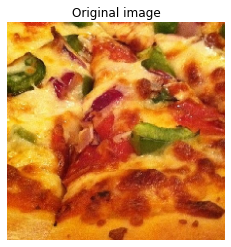

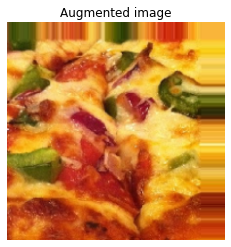

In [ ]:
import random
random_number = random.randint(0, 31) 
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [ ]:
# Create a model that trains on augmented data

#set seed
tf.random.set_seed(42)

# create model
model_6 = Sequential([
                      Conv2D(10, 3, activation = 'relu', input_shape= (224, 224, 3)),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation = 'relu', input_shape= (224, 224, 3)),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation = 'relu', input_shape= (224, 224, 3)),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(1, activation ='sigmoid')
])

# Compile 
model_6.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fit
history_6 = model_6.fit(train_data_augmented, 
            epochs = 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = valid_data,
            validation_steps = len(valid_data))



Epoch 1/5
47/47 [==============================] - 67s 1s/step - loss: 0.7272 - accuracy: 0.4507 - val_loss: 0.6903 - val_accuracy: 0.5820
Epoch 2/5
47/47 [==============================] - 69s 1s/step - loss: 0.6904 - accuracy: 0.5387 - val_loss: 0.6744 - val_accuracy: 0.7160
Epoch 3/5
47/47 [==============================] - 68s 1s/step - loss: 0.6983 - accuracy: 0.5133 - val_loss: 0.6771 - val_accuracy: 0.5480
Epoch 4/5
47/47 [==============================] - 69s 1s/step - loss: 0.6914 - accuracy: 0.5893 - val_loss: 0.6695 - val_accuracy: 0.6020
Epoch 5/5
47/47 [==============================] - 68s 1s/step - loss: 0.6670 - accuracy: 0.6373 - val_loss: 0.5837 - val_accuracy: 0.7960


In [ ]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_6.evaluate(valid_data)

16/16 [==============================] - 7s 422ms/step - loss: 0.5837 - accuracy: 0.7960


[0.5837273597717285, 0.7960000038146973]

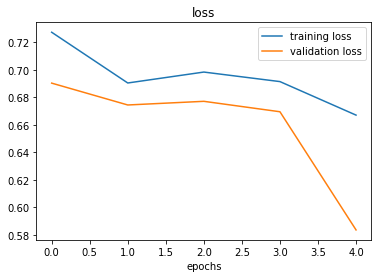

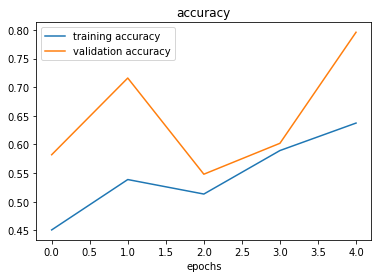

In [ ]:
# Check our model's training curve
plot_loss_curves(history_6)

In [ ]:
# let's try shuffling our data
print("Augmented Training Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                    target_size = (224, 224),
                                                                    batch_size =32,
                                                                    class_mode = 'binary',
                                                                    shuffle = True)

Augmented Training Data
Found 1500 images belonging to 2 classes.


In [ ]:
# new model with shuffled data

# set seed 
tf.random.set_seed(42) 

# create model 
model_7 = Sequential([
                      Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
                      MaxPool2D(),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation = 'sigmoid')
])

# Compile model 
model_7.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fit the model 
history_7 = model_7.fit(train_data_augmented,
                        epochs = 5, 
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = valid_data, 
                        validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 68s 1s/step - loss: 0.6315 - accuracy: 0.6387 - val_loss: 0.5044 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 67s 1s/step - loss: 0.5404 - accuracy: 0.7240 - val_loss: 0.4575 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 69s 1s/step - loss: 0.4858 - accuracy: 0.7720 - val_loss: 0.3432 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 69s 1s/step - loss: 0.4775 - accuracy: 0.7787 - val_loss: 0.3269 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 67s 1s/step - loss: 0.4754 - accuracy: 0.7780 - val_loss: 0.3471 - val_accuracy: 0.8560


In [ ]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 10)      

In [ ]:
model_7.evaluate(valid_data)

16/16 [==============================] - 7s 419ms/step - loss: 0.3471 - accuracy: 0.8560


[0.3471117615699768, 0.8560000061988831]

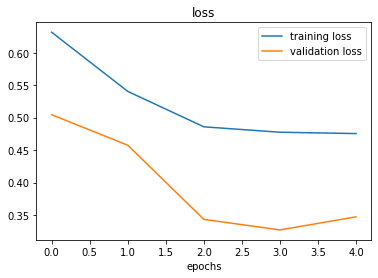

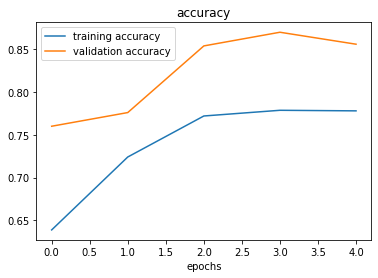

In [ ]:
plot_loss_curves(history_7)

### `7`. Repeat until Satisified

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/ `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs) 
* Find an ideal learning rate 
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case

## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with 
print(class_names)

['pizza' 'steak']


--2022-07-15 13:26:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2022-07-15 13:26:55 (91.6 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



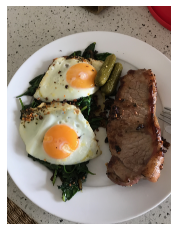

In [ ]:
# View our example images
#run once
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("/content/03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

we need to preprocess our image so it fits into the format the model wants

In [ ]:
def load_and_prep_image(filename, img_shape =224):
  """
  Reads an iamge from filename and turns it into a tensor and reshapes it 
  to (img_shape, img_shape. color_channels).
  """

  # read in the image
  img = tf.io.read_file(filename)
  #Decode the read file into a tensor
  img = tf.image.decode_image(img)
  #Resize the iamge
  img = tf.image.resize(img, size= [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis =0))

Looks like our custom image is being put through our model, however, it currently outputs a preiction probability to visualize the image as well as the model's prediction

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# we can index the predicted class by round the preiction probablity
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  """

  # Import the target image and preprocess it 
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Preidiction: {pred_class}")
  plt.axis(False);

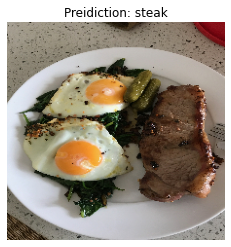

In [ ]:
pred_and_plot(model_7, '03-steak.jpeg')

Our model works!!

# Multi-class image Classification

Note: We've just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step it up a notch with 10 classes of food (multi-class classification)

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## `1`. Become One with the Data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", 'r')
zip_ref.extractall()
zip_ref.close()

--2022-07-15 14:08:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 108.177.119.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   104MB/s    in 4.8s    

2022-07-15 14:08:08 (104 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/train.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream.
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon.
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger.
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi.
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry.
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza.
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen.
There are 10 directorie

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

print(train_dir)

10_food_classes_all_data/train/


In [ ]:
# Let's get the class names
import pathlib
import numpy as np 
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names) 

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image Shape: (512, 512, 3) 


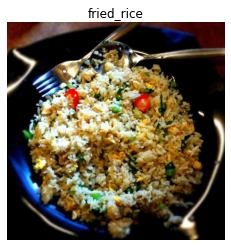

In [ ]:
# Visualize 
import random 
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

## `2`. Preprocess the Data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data in from directories and turn it into batches
train_data  = train_datagen.flow_from_directory(train_dir,
                                                target_size = (224,224),
                                                batch_size = 32, 
                                                class_mode = 'categorical')

test_data  = train_datagen.flow_from_directory(test_dir,
                                                target_size = (224,224),
                                                batch_size = 32, 
                                                class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## `3`. Create a model (start with a baseline)

We've been talking about the CNN explainer website...
how about we take their model (also on 10 classes) and replicate it?

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

# Set random seed
tf.random.set_seed(42)

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
                      Conv2D(10, 3, activation ='relu'),
                      Conv2D(10, 3, activation ='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation ='relu'),
                      Conv2D(10, 3, activation ='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation = 'softmax')
])

# Compile
model_8.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fit the model
history_8 = model_8.fit(train_data, 
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 537s 2s/step - loss: 2.1144 - accuracy: 0.2289 - val_loss: 1.9665 - val_accuracy: 0.2888
Epoch 2/5
235/235 [==============================] - 526s 2s/step - loss: 1.9079 - accuracy: 0.3309 - val_loss: 1.9739 - val_accuracy: 0.3080
Epoch 3/5
235/235 [==============================] - 539s 2s/step - loss: 1.7004 - accuracy: 0.4201 - val_loss: 1.8940 - val_accuracy: 0.3296
Epoch 4/5
235/235 [==============================] - 522s 2s/step - loss: 1.1899 - accuracy: 0.6015 - val_loss: 2.1365 - val_accuracy: 0.3208
Epoch 5/5
235/235 [==============================] - 527s 2s/step - loss: 0.5730 - accuracy: 0.8165 - val_loss: 2.8385 - val_accuracy: 0.2972


## `5`. Evaluate the model

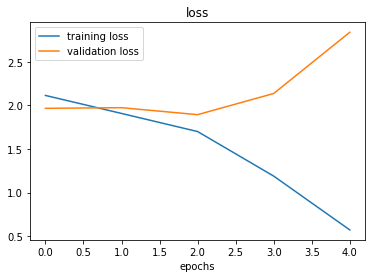

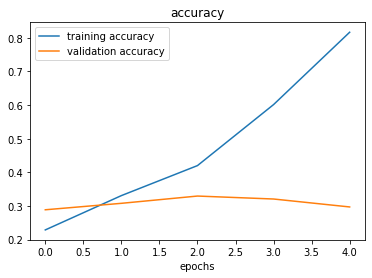

In [ ]:
plot_loss_curves(history_8)

In [ ]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 10)      

It seems our data is overfitting on the training data and underperforming on the validation/test data

## `6`. Adjust different hyperparameters and improve the model 

Due to its performance on the training data, it's clear our model is learning something, however it is overfitting. 

So let's try and fix overfitting by: 

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns

* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify is to reduce # of layers or hidden units

* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diveristy to it (without altering the original data)

* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [ ]:
# How about we simplify the model first? 
model_9 = Sequential([                      
                      Conv2D(10, 3, activation ='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation ='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation = 'softmax')
                      
])

# Compile
model_9.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fit the model
history_9 = model_9.fit(train_data, 
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 537s 2s/step - loss: 0.2039 - accuracy: 0.9408 - val_loss: 4.1608 - val_accuracy: 0.2804
Epoch 2/5
235/235 [==============================] - 529s 2s/step - loss: 0.0564 - accuracy: 0.9864 - val_loss: 5.3867 - val_accuracy: 0.2708
Epoch 3/5
235/235 [==============================] - 521s 2s/step - loss: 0.0186 - accuracy: 0.9957 - val_loss: 5.8903 - val_accuracy: 0.2700
Epoch 4/5
235/235 [==============================] - 523s 2s/step - loss: 0.0094 - accuracy: 0.9983 - val_loss: 6.7653 - val_accuracy: 0.2848
Epoch 5/5
235/235 [==============================] - 523s 2s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 7.0492 - val_accuracy: 0.2764


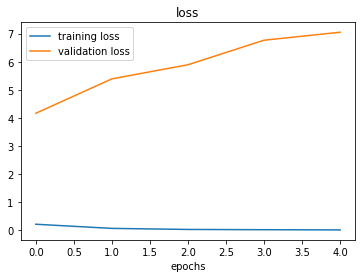

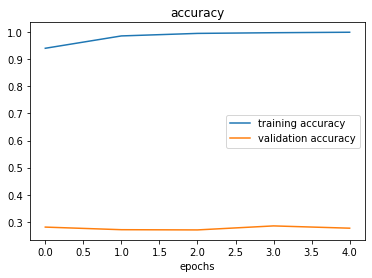

In [ ]:
plot_loss_curves(history_9)

Our simplify experiment didnt work let's try data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255., 
                                             rotation_range = 0.2, # How much do you want to rotate an image?
                                             shear_range = 0.2, #  How much do you want to shear an image?                                            
                                             zoom_range = 0.2, # How much do you want to zoom an image?
                                             width_shift_range = 0.2, # How much do you want to move your image on the x axis
                                             height_shift_range = 0.2, # How do you want to move the image on the y axis
                                             horizontal_flip = True) # do you want to flip the image

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                target_size = (224,224),
                                                batch_size = 32, 
                                                class_mode = 'categorical',
                                                shuffle=True)                                         

Found 7500 images belonging to 10 classes.


In [ ]:
# How about we simplify the model first? 
model_10 = Sequential([                      
                      Conv2D(10, 3, activation ='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation ='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation = 'softmax')
                      
])

# Compile
model_10.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fit the model
history_10 = model_10.fit(train_data_augmented, 
                       epochs = 5,
                       steps_per_epoch = len(train_data_augmented),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 332s 1s/step - loss: 2.1622 - accuracy: 0.2109 - val_loss: 2.0014 - val_accuracy: 0.2896
Epoch 2/5
235/235 [==============================] - 320s 1s/step - loss: 2.0363 - accuracy: 0.2839 - val_loss: 1.9207 - val_accuracy: 0.3240
Epoch 3/5
235/235 [==============================] - 319s 1s/step - loss: 1.9838 - accuracy: 0.3133 - val_loss: 1.8947 - val_accuracy: 0.3524
Epoch 4/5
235/235 [==============================] - 322s 1s/step - loss: 1.9538 - accuracy: 0.3205 - val_loss: 1.8088 - val_accuracy: 0.3896
Epoch 5/5
235/235 [==============================] - 321s 1s/step - loss: 1.9300 - accuracy: 0.3343 - val_loss: 1.8964 - val_accuracy: 0.3488


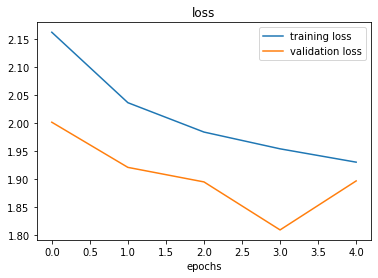

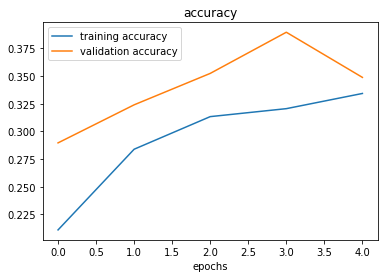

In [ ]:
plot_loss_curves(history_10)

## `7`. Repeat until satisfied

We could keep going here, continually trying to bring our loss curves close together and improving the accuracy.

We could: 
- restruct our model's architecture (increase more layers/ hidden units)
- adjust the learning rate
- change the optimization function
- change the activation function 
- traing for longer
- use transfer learning 

Make a prediction on custom image with our trained model

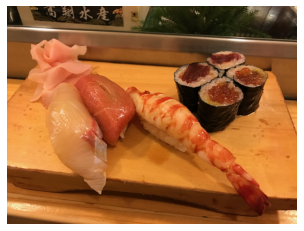

In [ ]:
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
sushi = mpimg.imread("03-sushi.jpeg")
plt.imshow(sushi)
plt.axis(False);

In [ ]:
# Reconfigure function to allow multi class 
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  """

  # Import the target image and preprocess it 
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Preidiction: {pred_class}")
  plt.axis(False);

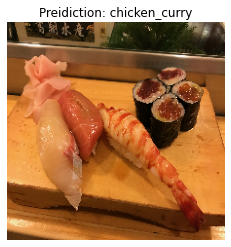

In [ ]:
pred_and_plot(model_10, "03-sushi.jpeg", class_names)

## Saving and loading our model

In [ ]:
# Save a model
model_10.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [ ]:
# Load in a model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 40s 498ms/step - loss: 1.8964 - accuracy: 0.3488


[1.896430253982544, 0.34880000352859497]

In [ ]:
# Compare our unsaved model's results (same as above)
model_10.evaluate(test_data)

79/79 [==============================] - 34s 422ms/step - loss: 1.8964 - accuracy: 0.3488


[1.8964306116104126, 0.34880000352859497]